<a href="https://colab.research.google.com/github/melvinps/Schindler-Data-Analysis/blob/main/Callback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT DATA**


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import defaultdict

%load_ext google.colab.data_table
%matplotlib inline

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [58]:
df = pd.read_excel('2021 04 28 Daily Callbacks.xlsx')

In [59]:
df = df[['Location','Notification date','Name','Description of technical object','Description','Long Text Description']].dropna(how='all')

In [60]:
df['Notification date'] = pd.to_datetime(df['Notification date'])

# **SELECT ROUTE AND CURRENT MONTH**



In [5]:
# Select Route
enter = input('Enter Route: ')
input_route = enter.upper().split(' ')

route_lst = []
for route in input_route:
  route_lst.append('808' + route)

print('Route Selected: ' + str(route_lst))

Enter Route: d01
Route Selected: ['808D01']


In [6]:
# Enter Current Month
m = input('Enter the current month: ')
print('Month selected: ' + m)


Enter the current month: 4
Month selected: 4


In [7]:
# Last 3 months
pass_month = []
count = int(m)
while count > 1:
  pass_month.append(str(count))  
  count = count - 1

print('Pass 3 months: ' + str(pass_month))

Pass 3 months: ['4', '3', '2']


In [93]:
#Callback logs(No filter)
df_all = df
# Callback logs Selected Route
df_route = df.loc[(df['Location']).isin(route_lst)]
# Current month callback logs of Selected Route
df_route_current_month = df_route.loc[df_route['Notification date'].dt.month == int(m)]
# Last 3 months callback logs of Selected Route
df_route_pass_month = df_route.loc[(df_route['Notification date'].dt.month).isin(pass_month)]

# **TOP 10 SITES WITH HIGHEST CALLBACK IN PASS 3 MONTHS (SELECED ROUTES)**


In [169]:
top = df_route_pass_month.drop(['Notification date','Location','Long Text Description','Description of technical object'], axis=1)
top.rename({'Description': 'Numbers of Callbacks'}, axis=1, inplace=True)
top.groupby(['Name']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:10]
top_10 = top.groupby(['Name']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:10].reset_index()
top_10

,Name,Numbers of Callbacks
0,BANK OF SINGAPORE,59
1,OCBC CENTRE,55
2,HSBC BUILDING,32
3,THE CENTRAL,30
4,CAPITAL TOWER,28
5,ALTEZ @ ENGGOR,23
6,SINGAPORE GENERAL HOSPITAL,20
7,INTERNATIONAL PLAZA,17
8,79 ANSON ROAD (MCST 2465),16
9,THE CLAN,15


### **Visualization**

**TOP 10 SITES NUMBER OF CALLBACK**

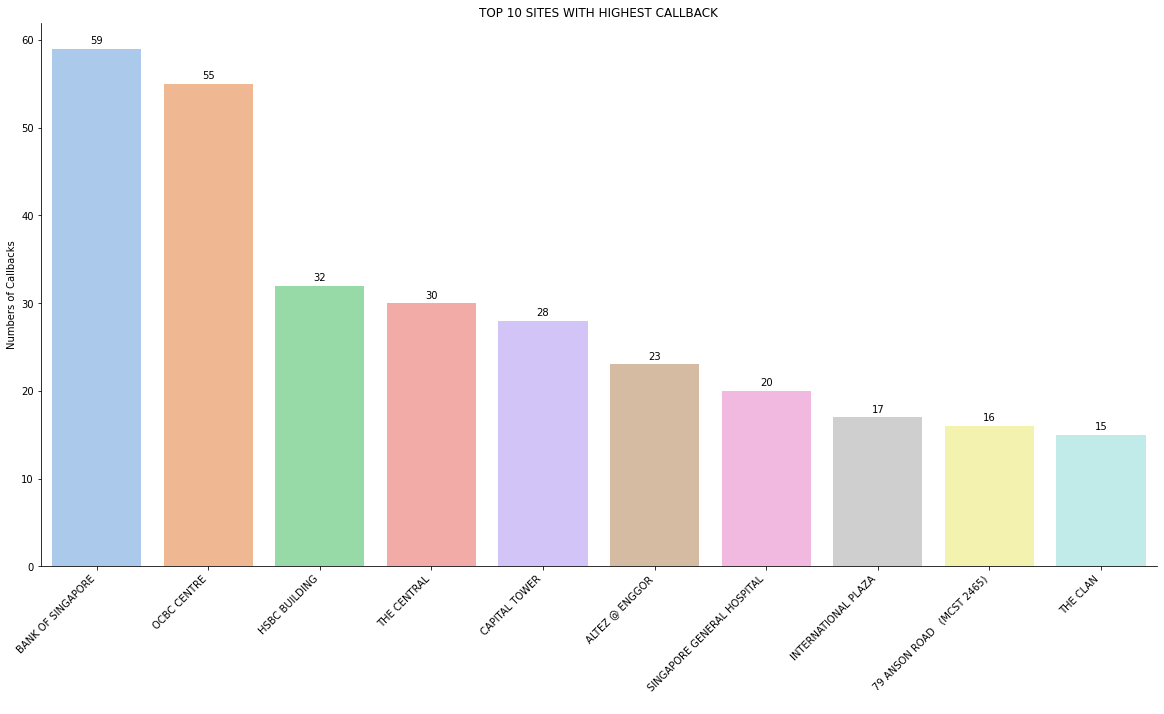

In [178]:
fig, ax = plt.subplots(figsize=(20,10))
g =sns.barplot(x='Name',y='Numbers of Callbacks',data=top_10,ax=ax, palette='pastel')
plt.xticks(rotation=45, ha='right')
g.set_xlabel(' ')
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)
g.set_title('TOP 10 SITES WITH HIGHEST CALLBACK')

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 8), 
               textcoords = 'offset points')

**NUMBER OF CALLBACKS PER MONTH FOR TOP 10 SITES**

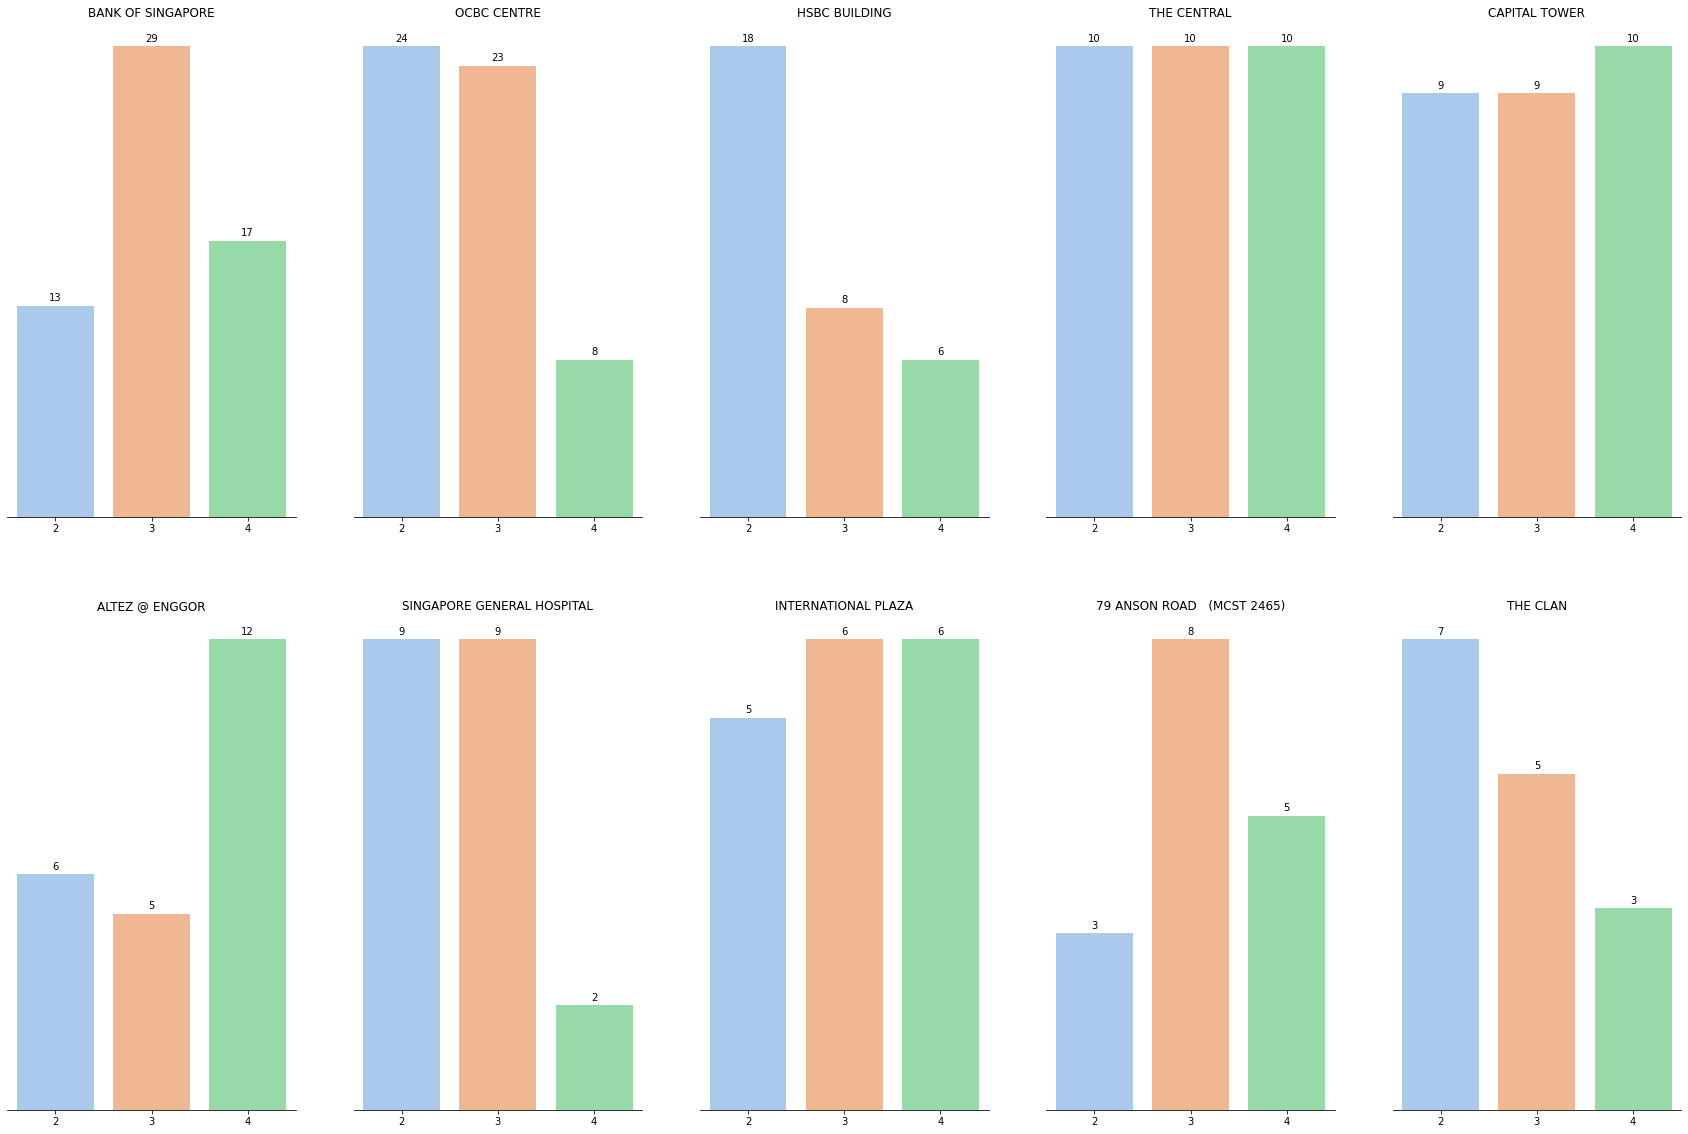

In [171]:
# Get the top 10 sites
top_10_lst = []
for site in top_10['Name']:
  if site not in top_10_lst:
    top_10_lst.append(site)

# Prepare Dataframe
top_month = df_route_pass_month.drop(['Location','Long Text Description','Description of technical object'], axis=1)
top_month['Notification date'] = top_month['Notification date'].dt.month
df_top_10 = top_month.loc[(top_month['Name']).isin(top_10_lst)]
df_top_10 = df_top_10.groupby(['Name'])

# Plot
counti=0 # Plot row pointer
countj=0 # Plot col pointer
fig,ax = plt.subplots(2, 5,figsize=(30,20)) # Define axes and figsize 

for i in top_10_lst:
    gp = df_top_10.get_group(i).groupby(['Notification date']).count().reset_index()
    f = sns.barplot(x='Notification date',y='Description',data=gp, palette='pastel',order=gp['Notification date'], ax = ax[counti, countj])
    # Plot position pointer
    countj += 1
    if countj == 5:
      counti += 1
      countj = 0
    
    # Plot display
    f.set_title(i)
    f.set_xlabel('')
    f.set_ylabel('')
    f.spines['right'].set_visible(False)
    f.spines['top'].set_visible(False)
    f.spines['left'].set_visible(False)
    f.get_yaxis().set_visible(False)

    for p in f.patches:
      f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 8), 
                    textcoords = 'offset points')

**NUMBER OF CALLBACK FOR EACH LIFT IN INDIVIDUAL SITE**

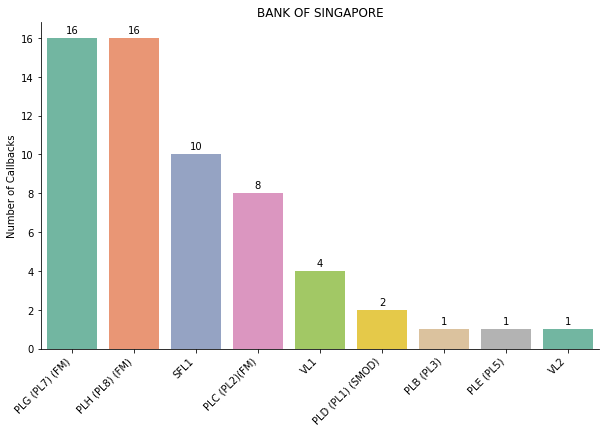

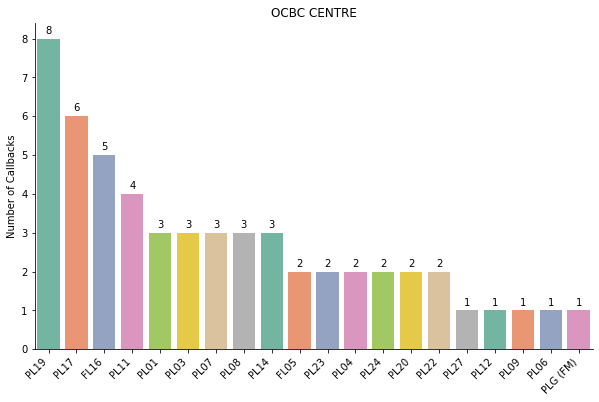

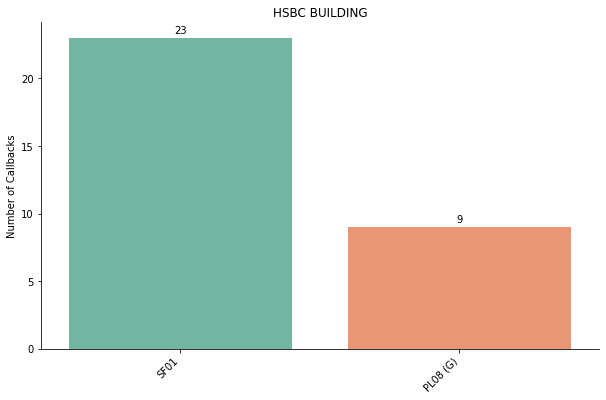

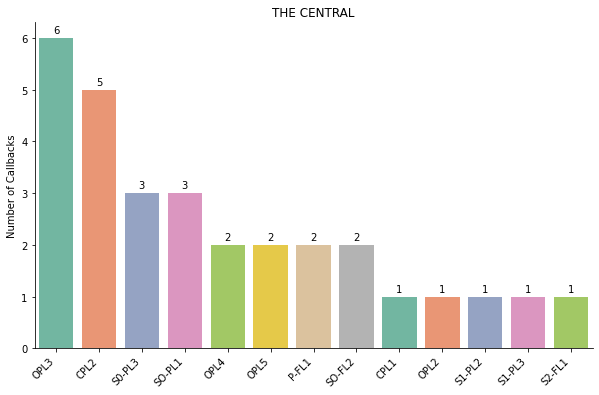

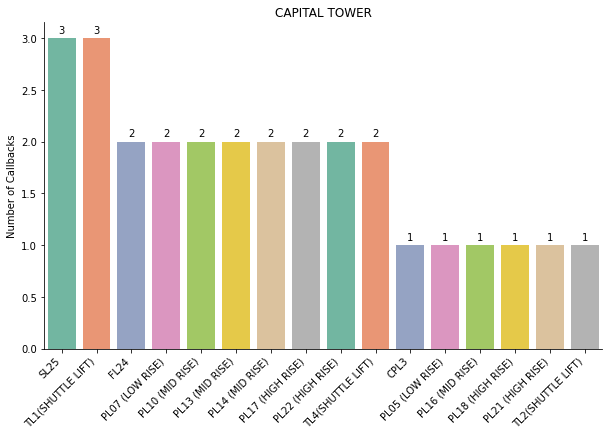

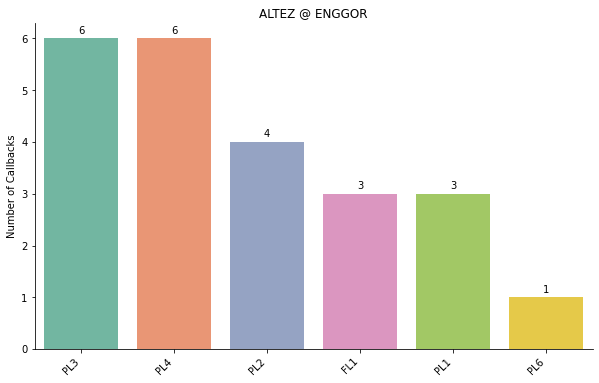

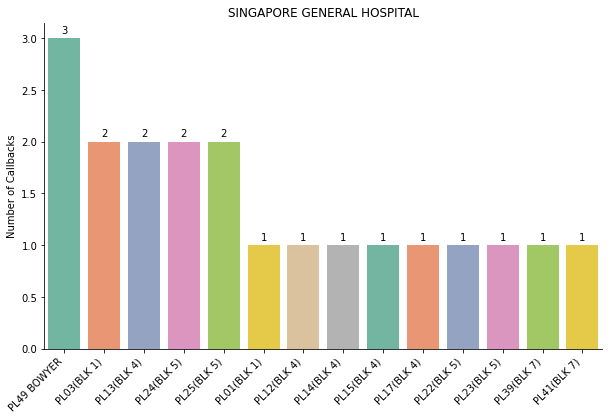

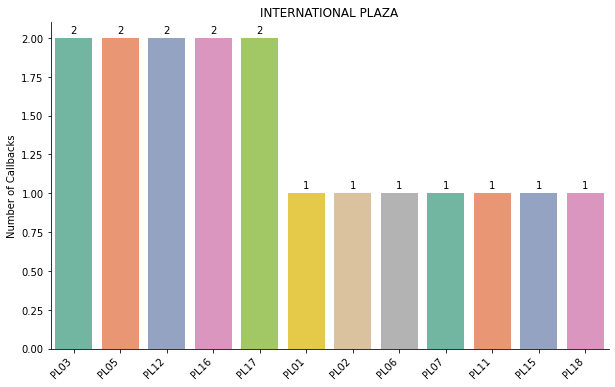

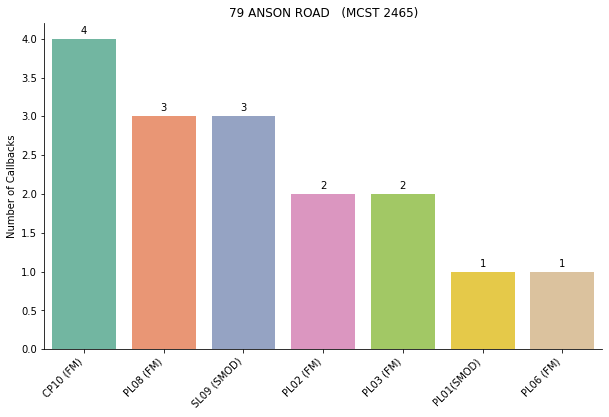

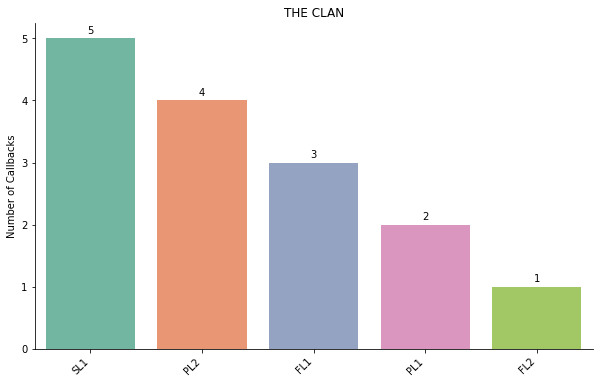

In [179]:
top_10_lst = []
for site in top_10['Name']:
  if site not in top_10_lst:
    top_10_lst.append(site)

df_top_10 = df_route_pass_month.loc[(df_route['Name']).isin(top_10_lst)]
df_top_10 = df_top_10.drop(['Notification date','Location','Long Text Description'], axis=1)
df_top_10 = df_top_10.groupby(['Name'])

for i in top_10_lst:
    gp = df_top_10.get_group(i).groupby(['Description of technical object']).count().sort_values(by=['Description'], ascending= False).reset_index()
    fig,ax = plt.subplots(1, figsize=(10,6))
    f = sns.barplot(x='Description of technical object',y='Description',data=gp, palette='Set2',order=gp['Description of technical object'])
    plt.xticks(rotation=45, ha='right')
    f.set_title(i)
    f.set_xlabel('')
    f.set_ylabel('Number of Callbacks')
    for p in f.patches:
      f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')

In [ ]:
# df_month = df_route_pass_month.loc[(df_route['Name']).isin(top_10_lst)]
# df_month = df_month.drop(['Location','Long Text Description'], axis=1)
# df_month['Notification date'] = df_route['Notification date'].dt.strftime("%B")
# df_month

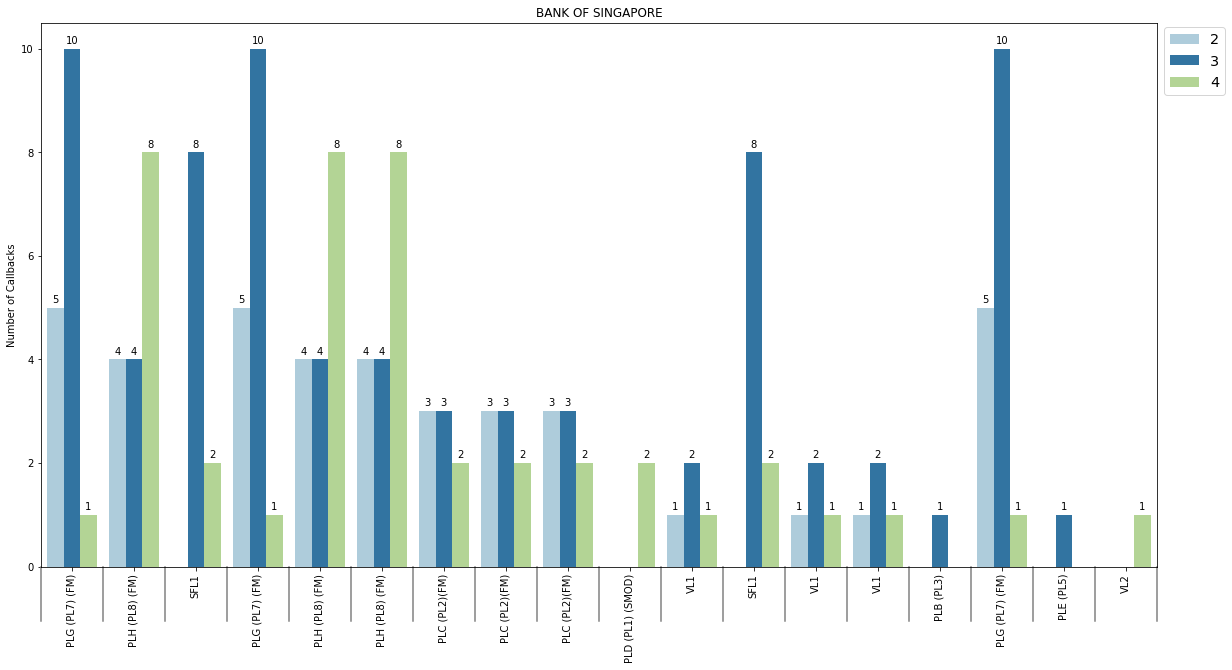

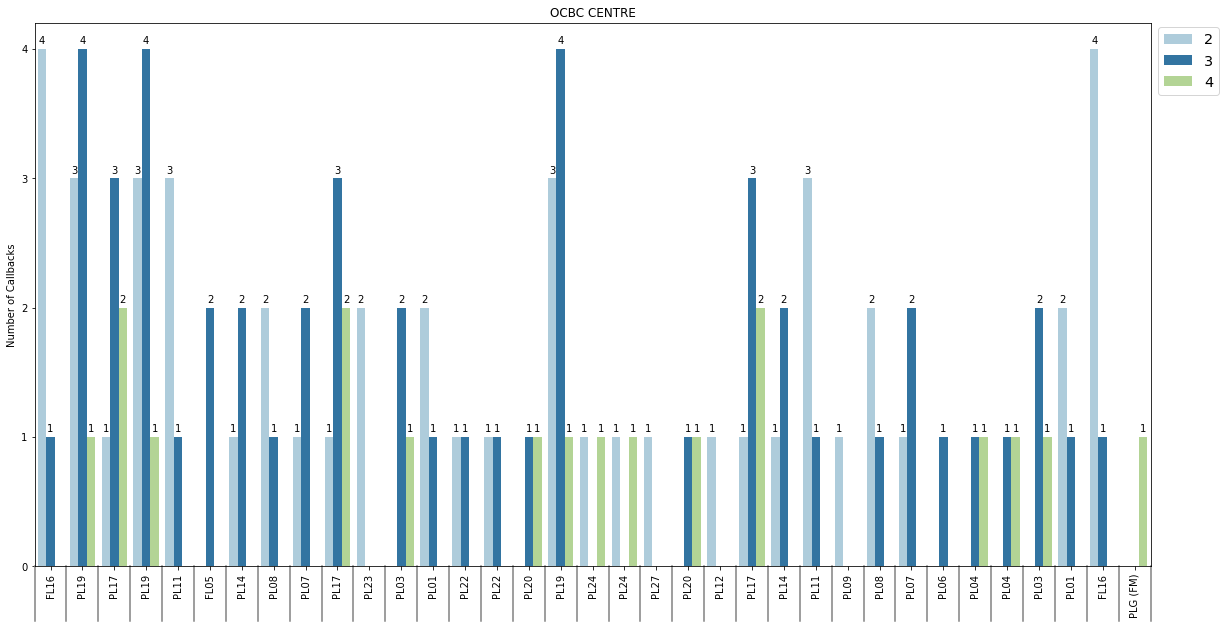

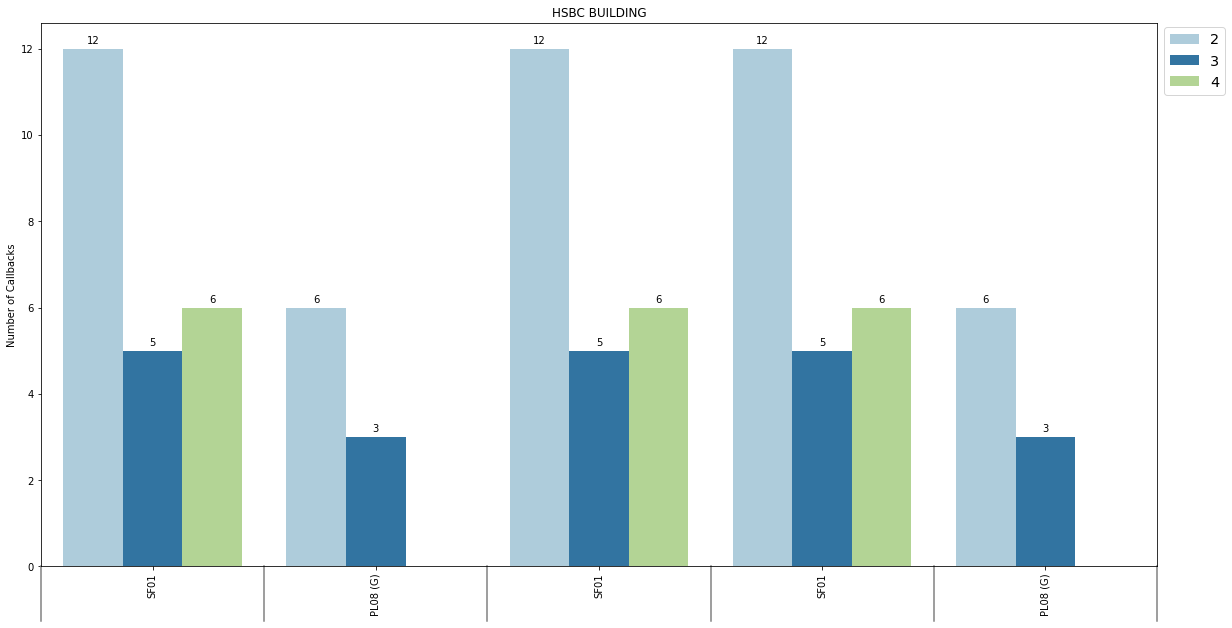

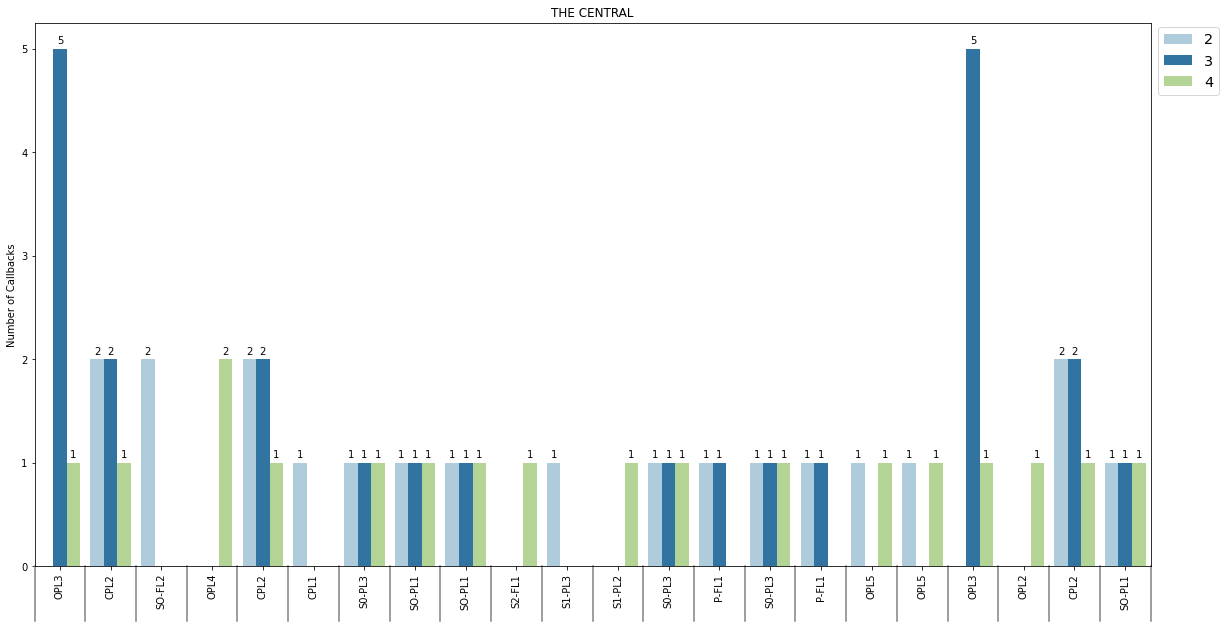

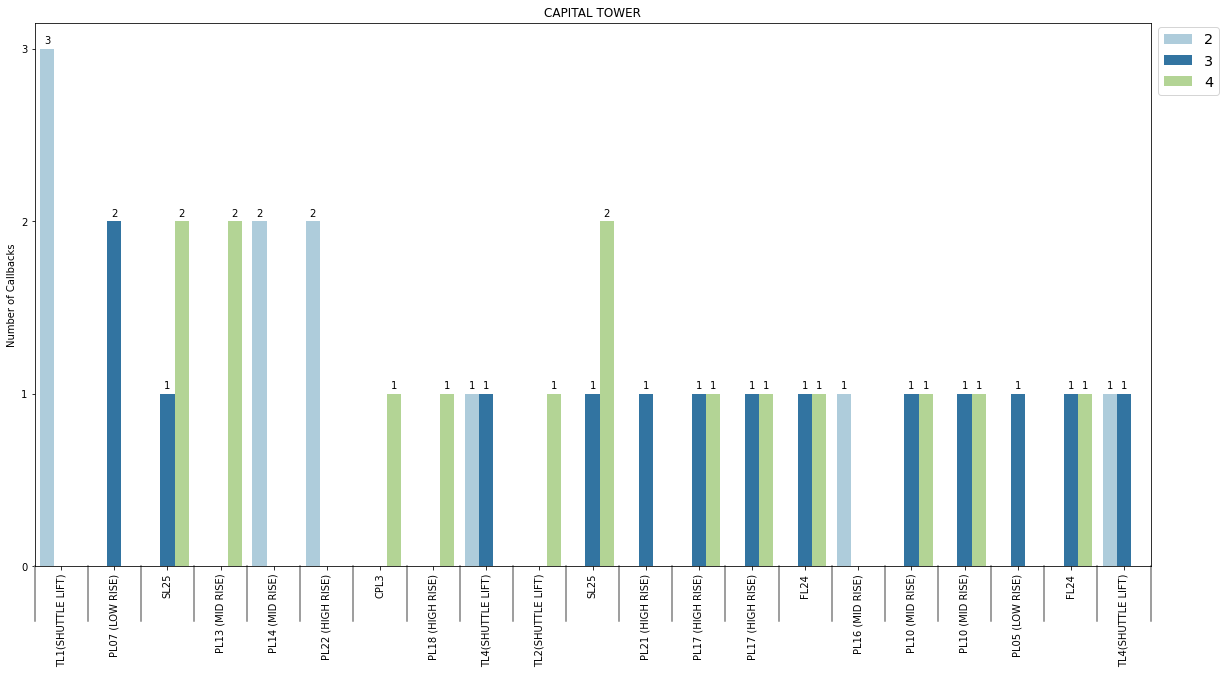

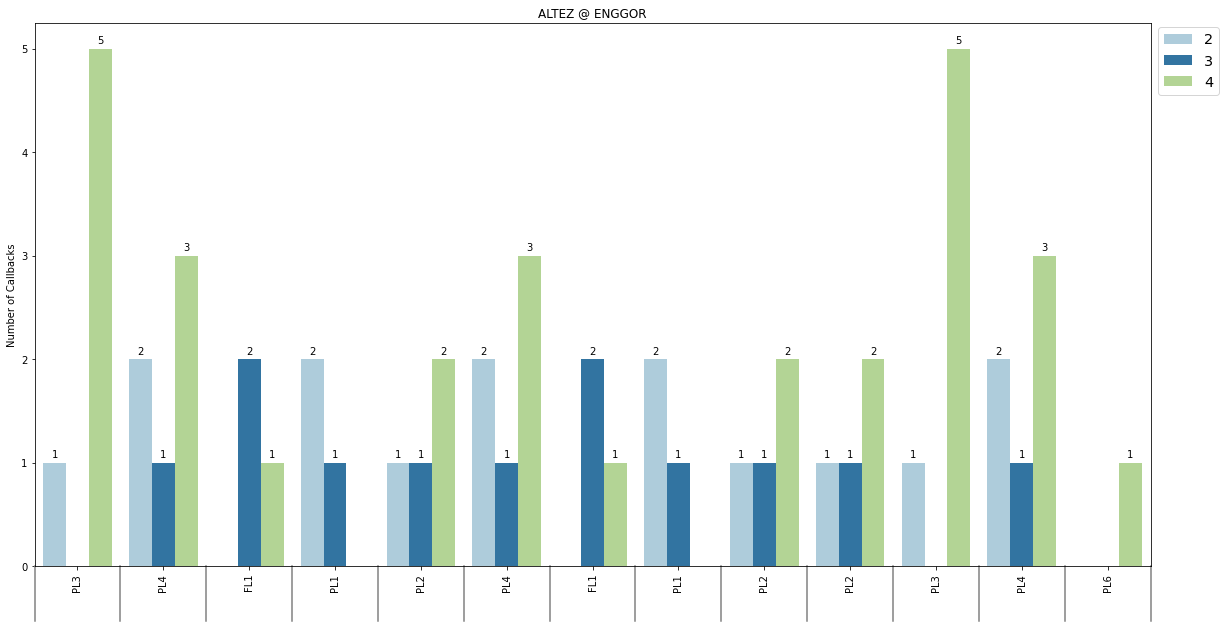

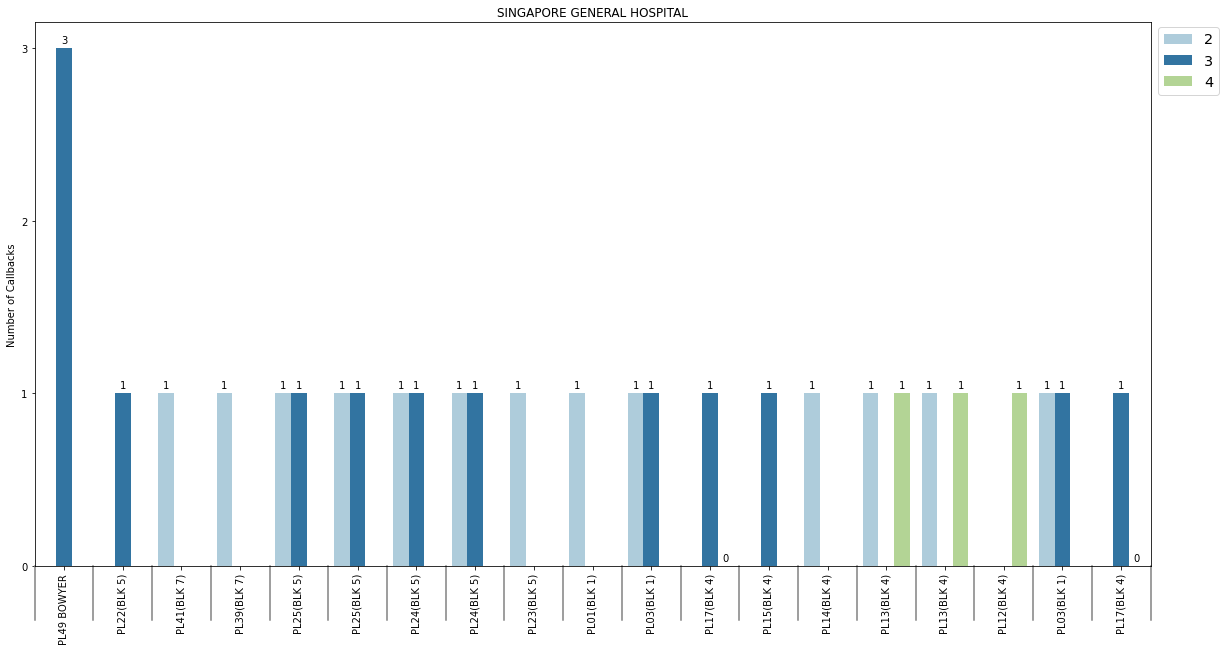

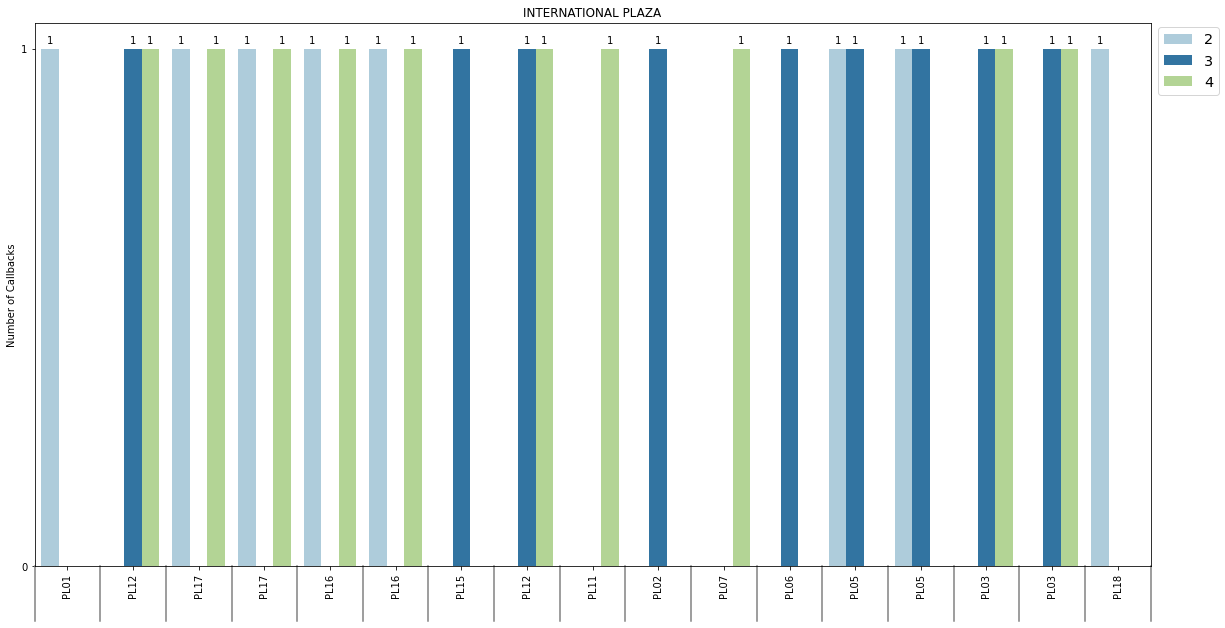

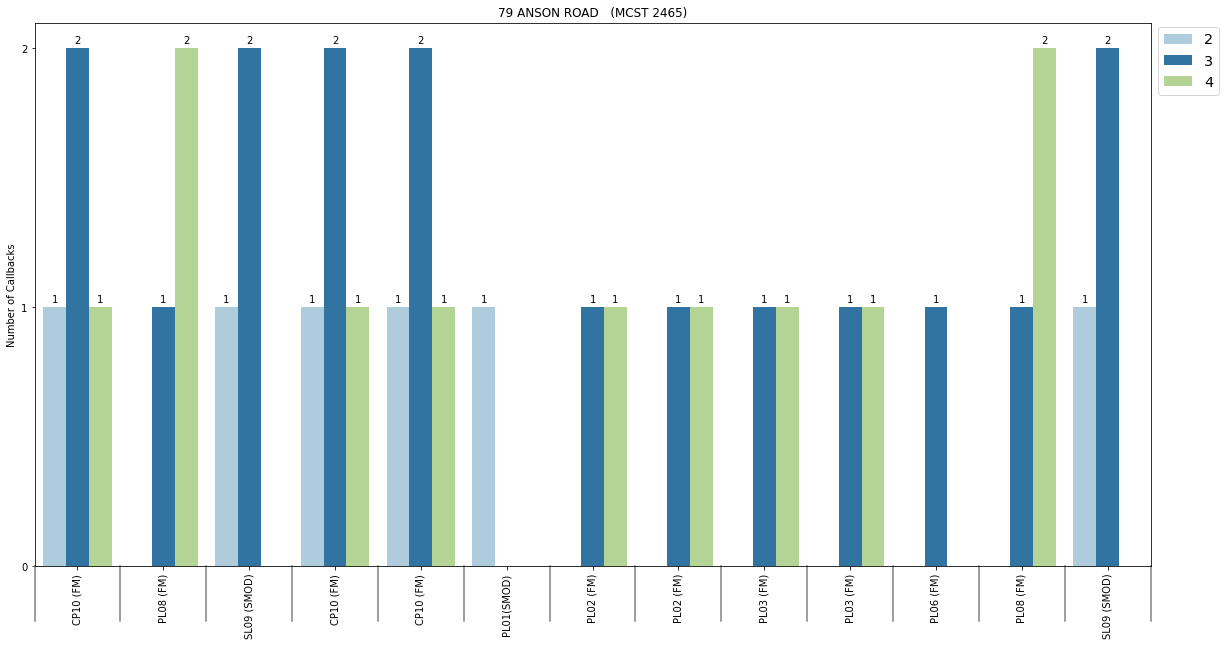

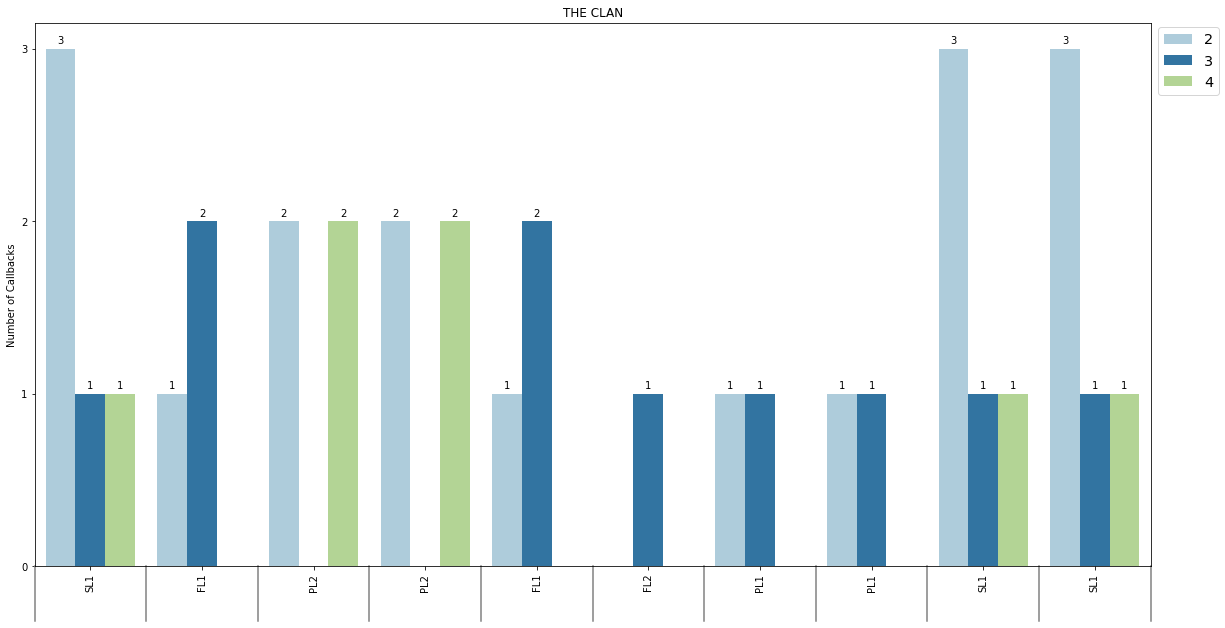

In [196]:
from itertools import groupby

df_month = df_route_pass_month.loc[(df_route['Name']).isin(top_10_lst)]
df_month = df_month.drop(['Location','Long Text Description'], axis=1)
df_month['Notification date'] = df_route['Notification date'].dt.month
df_month = df_month.groupby(['Name'])
df_month.count()

# Function for adding line in xtick
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1 , ypos],
                      transform=ax.transAxes, color='Gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

# Plot
for j in top_10_lst:
    gp = df_month.get_group(j).groupby(['Description of technical object','Notification date']).count().sort_values(by=['Description'], ascending= False).reset_index()
    fig,ax = plt.subplots(1, figsize=(20,10))
    f = sns.barplot(x='Description of technical object',y='Description', hue='Notification date',data=gp, palette='Paired',order=gp['Description of technical object'])
    plt.xticks(rotation=90, ha='center')
    f.set_title(j)
    f.set_xlabel('')
    f.set_ylabel('Number of Callbacks')
    plt.legend(bbox_to_anchor=(1, 1.005), loc='upper left', fontsize= 'x-large')
    label_group_bar_table(f, gp)
    plt.locator_params(axis="y", integer=True, tight=True)
    
    for p in f.patches:
      f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    # ax = plt.gca()
    # pos = []
    # for bar in ax.patches:
    #   pos.append(bar.get_x()+bar.get_width()/3.)


    # ax.set_xticks(pos,minor=True)
    # lab = []
    # for i in range(len(pos)):
    #   l = gp['Notification date'][i//len(gp['Notification date'])]
    #   lab.append(l)

    # ax.set_xticklabels(lab,minor=True)
    # ax.tick_params(axis='x', which='major', pad=15, size=0)
    # plt.setp(ax.get_xticklabels(), rotation=0)
    


# **SICK UNITS**

In [ ]:
# Function to find sick unit
def sickunit(df):
  df = df.drop(['Notification date', 'Description','Location'], axis=1)
  df = df.groupby(['Name','Description of technical object']).count().reset_index()
  df = df[df['Long Text Description']>=3]
  df = df.sort_values(by=['Long Text Description'], ascending= False)
  df = df.rename(columns={"Long Text Description": "Number of Callbacks"})
  return df

In [220]:
select = input('Select Month: ')
print('Month selected: ' + select)

Select Month: 3
Month selected: 3


In [221]:
# Selected Month Sick Units
df_sick= df_route.loc[df_route['Notification date'].dt.month == int(select)]
df_sick = sickunit(df_sick)
df_sick

,Name,Description of technical object,Number of Callbacks
22,BANK OF SINGAPORE,PLG (PL7) (FM),10
24,BANK OF SINGAPORE,SFL1,8
57,HSBC BUILDING,SF01,5
94,PEOPLE'S PARK COMPLEX,SL1,5
115,THE CENTRAL,OPL3,5
23,BANK OF SINGAPORE,PLH (PL8) (FM),4
83,OCBC CENTRE,PL19,4
99,RB CAPITAL BUILDING,PL02,4
3,20 COLLYER QUAY,PL1(PLA),3
4,78 SHENTON WAY (TWR 1),PL1,3


## **Visualization**

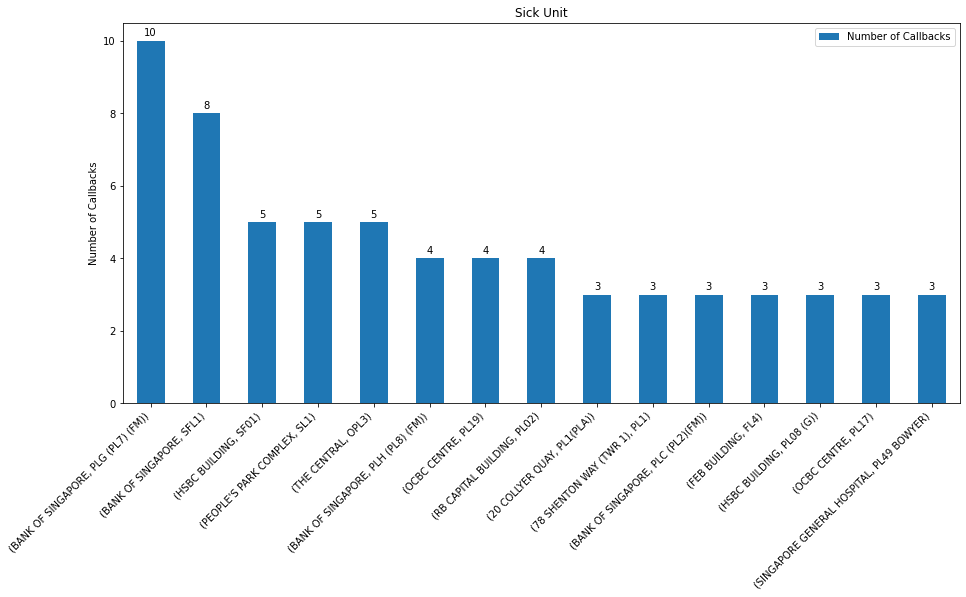

In [222]:
df_v = df_sick.set_index(['Name','Description of technical object'])
f =df_v.plot.bar(figsize=(15,7))
plt.xticks(rotation=45, ha='right')
f.set_title('Sick Unit')
f.set_xlabel('')
f.set_ylabel('Number of Callbacks')

for p in f.patches:
      f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')

# **LIFTS WITH HIGHEST CALLBACK IN PASS 3 MONTHS (SELECED ROUTES)**

In [ ]:
top_lift = df_route_pass_month.drop(['Notification date','Location','Long Text Description'], axis=1)
top_lift.rename({'Description': 'Numbers of Callbacks', 'Description of technical object':'Lift'}, axis=1, inplace=True)
df_top = top_lift.groupby(['Name','Lift']).count().sort_values(by=['Numbers of Callbacks'], ascending= False)[0:30]
df_top.reset_index()

,Name,Lift,Numbers of Callbacks
0,HSBC BUILDING,SF01,23
1,BANK OF SINGAPORE,PLH (PL8) (FM),16
2,BANK OF SINGAPORE,PLG (PL7) (FM),16
3,BANK OF SINGAPORE,SFL1,10
4,HSBC BUILDING,PL08 (G),9
5,BANK OF SINGAPORE,PLC (PL2)(FM),8
6,PEOPLE'S PARK COMPLEX,SL1,8
7,OCBC CENTRE,PL19,8
8,ION ORCHARD,FL1,8
9,RB CAPITAL BUILDING,PL02,8


In [ ]:
# temp2 = top_lift.groupby(['Name','Lift']).count().sort_values(by=['Numbers of Callbacks'], ascending= False).reset_index()
# temp = top_lift.groupby(['Name'])

# templst = []
# for site in temp2['Name'][0:20]:
#   if site not in templst:
#     templst.append(site)


# for i in templst:
#     gp = temp.get_group(i).groupby(['Lift']).count().reset_index()
#     n=len(gp.columns)
#     fig,ax = plt.subplots(1, figsize=(10,6))
#     f = sns.barplot(x='Lift',y='Numbers of Callbacks',data=gp, palette='Set2')
#     plt.xticks(rotation=45, ha='right')
#     f.set_title(i)
#     f.set_xlabel('')
#     for p in f.patches:
#       f.annotate('{:.0f}'.format(p.get_height(), '.1f'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                     ha = 'center', va = 'center', 
#                    xytext = (0, 8), 
#                    textcoords = 'offset points')
    
